In [1]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter as fsf 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


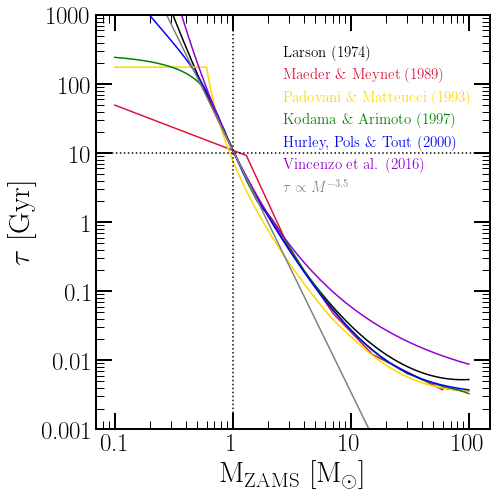

In [2]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel(r"M$_\text{ZAMS}$ [M$_\odot$]") 
ax.set_ylabel(r"$\tau$ [Gyr]") 
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.xaxis.set_major_formatter(fsf("%g")) 
ax.yaxis.set_major_formatter(fsf("%g")) 
ax.set_xlim([0.07, 150]) 
ax.set_ylim([1.e-3, 1.e3]) 
ax.set_yticks([10**_ for _ in range(-3, 4)]) 

forms = {
    "larson1974": vice.mlr.larson1974, 
    "mm1989": vice.mlr.mm1989, 
    "pm1993": vice.mlr.pm1993, 
    "ka1997": vice.mlr.ka1997, 
    "hpt2000": vice.mlr.hpt2000, 
    "vincenzo2016": vice.mlr.vincenzo2016, 
    "powerlaw": vice.mlr.powerlaw 
} 
labels = {
    "larson1974": "Larson (1974)", 
    "mm1989": "Maeder \& Meynet (1989)", 
    "pm1993": "Padovani \& Matteucci (1993)", 
    "ka1997": "Kodama \& Arimoto (1997)", 
    "hpt2000": "Hurley, Pols \& Tout (2000)", 
    "vincenzo2016": "Vincenzo et al. (2016)", 
    "powerlaw": r"$\tau \propto M^{-3.5}$" 
} 
colors = {
    "larson1974": "black", 
    "mm1989": "crimson", 
    "pm1993": "gold", 
    "ka1997": "green", 
    "hpt2000": "blue", 
    "vincenzo2016": "darkviolet", 
    "powerlaw": "grey" 
}

for form in forms.keys(): 
#     xvals = np.linspace(0.1, 100, 1000) 
    xvals = np.logspace(-1, 2, 1000) 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[form]], 
        "label": labels[form] 
    } 
    yvals = [forms[form](_) for _ in xvals] 
    ax.plot(xvals, yvals, **kwargs) 
    
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "linestyle": ":" 
}
ax.plot(2 * [1.], ax.get_ylim(), **kwargs) 
ax.plot(ax.get_xlim(), 2 * [10.], **kwargs) 

kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper center"), 
    "ncol": 1, 
    "frameon": False, 
    "bbox_to_anchor": (0.7, 0.96), 
    "handlelength": 0, 
    "fontsize": 15 
} 
leg = ax.legend(**kwargs) 
for i in range(len(forms.keys())): 
    leg.get_texts()[i].set_color(colors[list(forms.keys())[i]]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout() 